### 문제정의
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어 보자.

In [1]:
### 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  ### KNN 모델
from sklearn import metrics    ### 평가를 하기 위한

### 데이터 수집

In [2]:
data=pd.read_csv('./data/bmi_500.csv', index_col='Label')
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### 각 비만도 등급별 시각화

In [4]:
def myScatter(label,color):
    tmp=data.loc[label]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c=color,
               label=label)

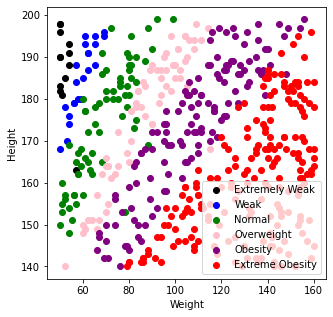

In [5]:
plt.figure(figsize=(5,5))
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')

plt.legend(loc='lower right')
plt.xlabel('Weight')
plt.ylabel('Height')


plt.show()

In [6]:
data.loc['Normal']['Weight']

Label
Normal    87
Normal    81
Normal    51
Normal    79
Normal    67
          ..
Normal    65
Normal    64
Normal    55
Normal    80
Normal    59
Name: Weight, Length: 69, dtype: int64

In [7]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [8]:
# Normal:정상
# Weak : 저체중
# Extremely Weak : 강한 저체중
# Overweight : 경도 비만
# Extreme Obesity : 고도 비만
# Obesity : 비만

### 모델링
+ 모델생성 및 하이퍼파라미터 조정

In [9]:
X=data.iloc[:,1:]   ### 행은 모두 가져와야하니까 첫 항에 : // 열은 2개만 있으면 되니까 1부터 끝까지의  1:

In [10]:
y=data.index

In [11]:
X_train=X.iloc[:350,:]   ### 7대 3으로 나눠서 쓸 것이기 때문에 350행까지 가져오고 컬럼은 모두 가져온다
y_train=y[:350]    ### 1차원 데이터니까 행만 가져오면 된다

X_test=X.iloc[350:,:]
y_test=y[350:]

In [12]:
knn= KNeighborsClassifier(n_neighbors=10)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
pre=knn.predict(X_test)

In [15]:
metrics.accuracy_score(pre,y_test)

0.9333333333333333

### 활용하기

In [16]:
knn.predict( [[179,72]])

array(['Normal'], dtype=object)